In [74]:
%pylab inline
from __future__ import print_function
from astropy.io import fits
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets

In [76]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [77]:
lda = LDA(n_components=2)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [78]:
X_lda = lda.transform(X)

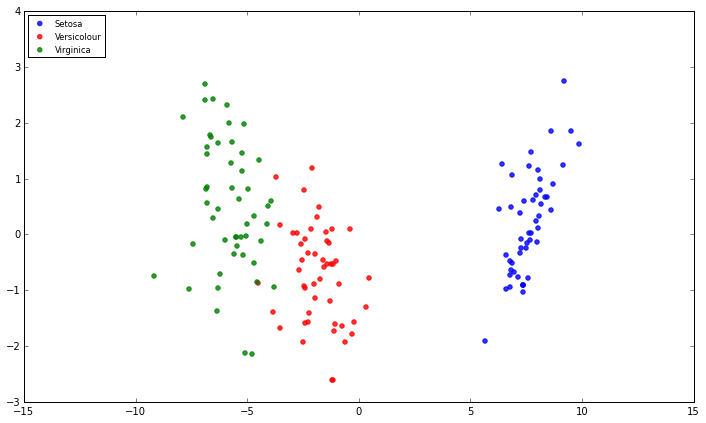

In [90]:
fig = plt.figure( figsize=(12, 7))
ax1 = fig.add_subplot(111)
for name, label, marke, color in [('Setosa', 0, '^', 'blue'), ('Versicolour', 1, 's', 'red'), ('Virginica', 2, 'o', 'green')]:
    ax1.scatter(X_lda[y == label, 0], X_lda[y == label, 1], color=color, alpha=.8,
                label=name, marker = marker,  cmap=plt.cm.spectral)
ax1.legend(loc='upper left', fontsize='small', scatterpoints=1)
    

plt.show()    

In [91]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

In [92]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [93]:
from sklearn.preprocessing import LabelEncoder

X = df[[0,1,2,3]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}


In [94]:
# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

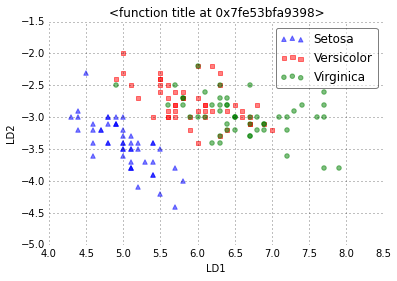

In [95]:
ax = plt.subplot(111)
for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

    plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

plt.xlabel('LD1')
plt.ylabel('LD2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title(title)

# hide axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.grid()
plt.tight_layout
plt.show()

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [ 0.92461621  0.05301557]


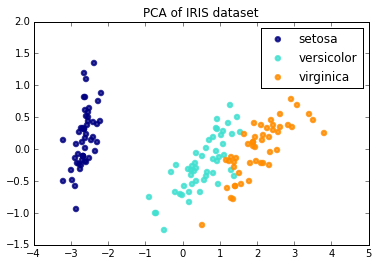

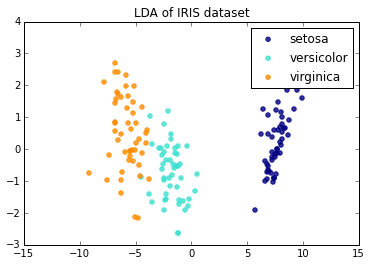

In [89]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()